## Seaborn Example 1

In [6]:
import matplotlib.pyplot as plt  ## matplotlib is needed for the figure settings
import seaborn as sns            ## seabon library https://seaborn.pydata.org/
import pprint                    ## Helps printing lists and dictionaries in a more readable format

import altair as alt             ## Vega based python visualization library https://altair-viz.github.io/
from vega_datasets import data   ## Vega's datasetsZ

import pandas as pd                  ## Pandas library for loading and processing tabular data
from tqdm.notebook import tqdm as tq ## progress bar for lengthy loops

In [7]:
### https://seaborn.pydata.org/introduction.html
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


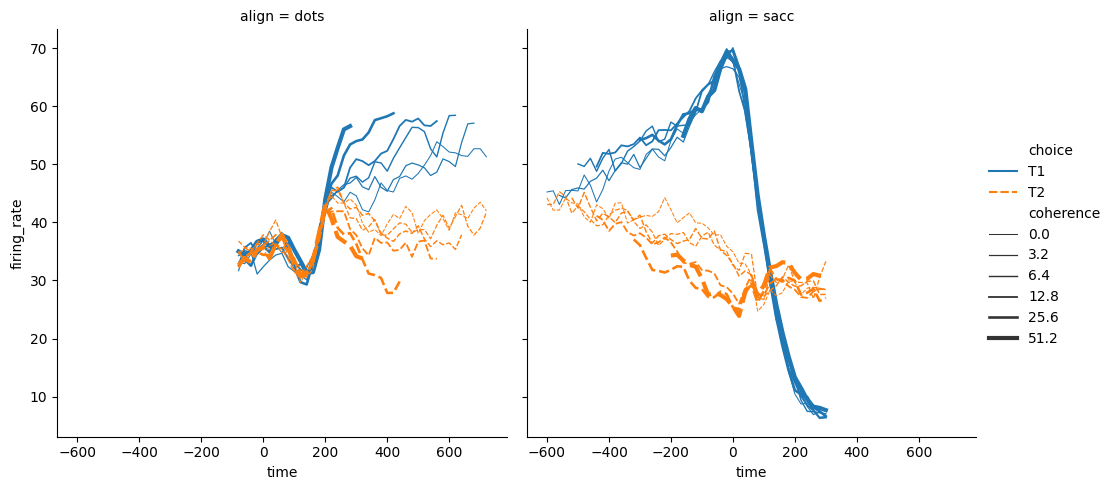

In [8]:
sns.relplot(x="time",                     ## x axis attr
            y="firing_rate",              ## y axis attr
            col="align",                  ## 1 variable for each column (each plots)
            hue="choice",                 ## color coding based on category
            size="coherence",             ## Size based on coherence column (attr)
            style="choice",               ## Style based on choice attr
            kind="line",                  ## relational line chart
            legend="full",                ## add all elements to legend
            data=dots);                   ## pandas dataframe: dots

# Data from US Census

## Get data from the following source:
https://github.com/umassdgithub/Age_State



In [9]:
source_links = ["https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2010.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2011.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2012.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2013.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2014.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2015.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2016.csv"]

In [10]:

start_year = 2010
dfs = []
for i,link in tq(enumerate(source_links)):
  df_temp = pd.read_csv(link,skiprows=1) ## the first row is extra, so skip it
  df_temp["date"]= start_year + i        ## files are sorted by year of estimate
  dfs.append(df_temp)

df_ages_all = pd.concat(dfs)          ## returns 1 dataframe for all the dataframes in the list

df_ages = df_ages_all.copy()          ## Keep an original copy of the data
df_ages.head(4)

0it [00:00, ?it/s]

,id,Geographic Area Name,Female!!Estimate!!AGE!!15 to 19 years,Female!!Margin of Error!!AGE!!15 to 19 years,Female!!Estimate!!AGE!!20 to 24 years,Female!!Margin of Error!!AGE!!20 to 24 years,Female!!Estimate!!AGE!!25 to 29 years,Female!!Margin of Error!!AGE!!25 to 29 years,Female!!Estimate!!AGE!!30 to 34 years,Female!!Margin of Error!!AGE!!30 to 34 years,...,Total!!Estimate!!PERCENT ALLOCATED!!Age,Total!!Margin of Error!!PERCENT ALLOCATED!!Age,Male!!Estimate!!PERCENT ALLOCATED!!Sex,Male!!Margin of Error!!PERCENT ALLOCATED!!Sex,Male!!Estimate!!PERCENT ALLOCATED!!Age,Male!!Margin of Error!!PERCENT ALLOCATED!!Age,Female!!Estimate!!PERCENT ALLOCATED!!Sex,Female!!Margin of Error!!PERCENT ALLOCATED!!Sex,Female!!Estimate!!PERCENT ALLOCATED!!Age,Female!!Margin of Error!!PERCENT ALLOCATED!!Age
0,0400000US01,Alabama,6.8,0.1,7.0,0.2,6.4,0.1,6.1,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0400000US02,Alaska,7.3,0.4,7.7,0.4,7.3,0.2,6.8,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0400000US04,Arizona,6.9,0.1,6.6,0.1,6.7,0.1,6.4,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0400000US05,Arkansas,7.0,0.2,6.8,0.3,6.2,0.2,6.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#for col in df_ages.columns:
#  print(col)

## drop all the extra cols and just keep the needed ones

In [11]:
needed_cols = ["Geographic Area Name","date","Total!!Estimate!!Total population"] ## when working with the total population of each state only
for col in df_ages.columns:
  if "Total!!Estimate!!AGE" in col:
    needed_cols.append(col)
df_ages = df_ages[needed_cols]
new_col_names =["state","date","total"] + [col.split("!!")[3] for col in df_ages.columns[3:]]
df_ages.columns = new_col_names

In [12]:
df_ages

,state,date,total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,Alabama,2010,4785298,6.4,6.5,6.7,7.3,7.1,6.4,6.2,...,6.6,7.2,7.2,6.5,5.8,4.3,3.4,2.6,1.8,1.6
1,Alaska,2010,713985,7.5,7.0,7.3,7.2,7.8,7.7,6.8,...,7.3,7.9,7.8,7.1,5.2,2.9,1.9,1.2,0.9,0.6
2,Arizona,2010,6413737,7.1,7.0,7.1,7.2,6.9,6.9,6.5,...,6.3,6.6,6.5,5.9,5.6,4.4,3.4,2.5,1.9,1.6
3,Arkansas,2010,2921606,6.7,6.7,6.9,7.2,6.8,6.4,6.2,...,6.3,6.9,7.0,6.2,5.9,4.6,3.5,2.6,2.0,1.8
4,California,2010,37349363,6.8,6.8,6.9,7.6,7.5,7.3,6.9,...,7.0,7.2,6.9,5.9,5.0,3.5,2.6,2.1,1.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Washington,2016,7288000,6.2,6.4,6.1,6.2,6.6,7.5,7.2,...,6.1,6.5,6.6,6.7,6.3,5.3,3.7,2.4,1.6,1.8
48,West Virginia,2016,1831102,5.6,5.6,5.8,6.2,6.3,6.0,5.8,...,6.3,6.4,6.9,7.4,7.1,6.5,4.6,3.3,2.0,2.3
49,Wisconsin,2016,5778709,5.8,6.2,6.3,6.6,7.0,6.2,6.4,...,5.7,6.3,7.2,7.4,6.6,5.4,3.8,2.7,2.0,2.2
50,Wyoming,2016,585501,6.5,7.5,6.4,6.4,6.5,6.9,6.9,...,6.1,5.7,6.1,6.7,7.1,5.2,3.9,2.5,1.6,1.7


# Seaborn Example 2
- by visualizing the population each year, we don't see any changes in the years. Is that correct?
- To answer this question, we calculate the diff for each year, each state


Text(0.5, 1.0, 'Total Population Per Year')

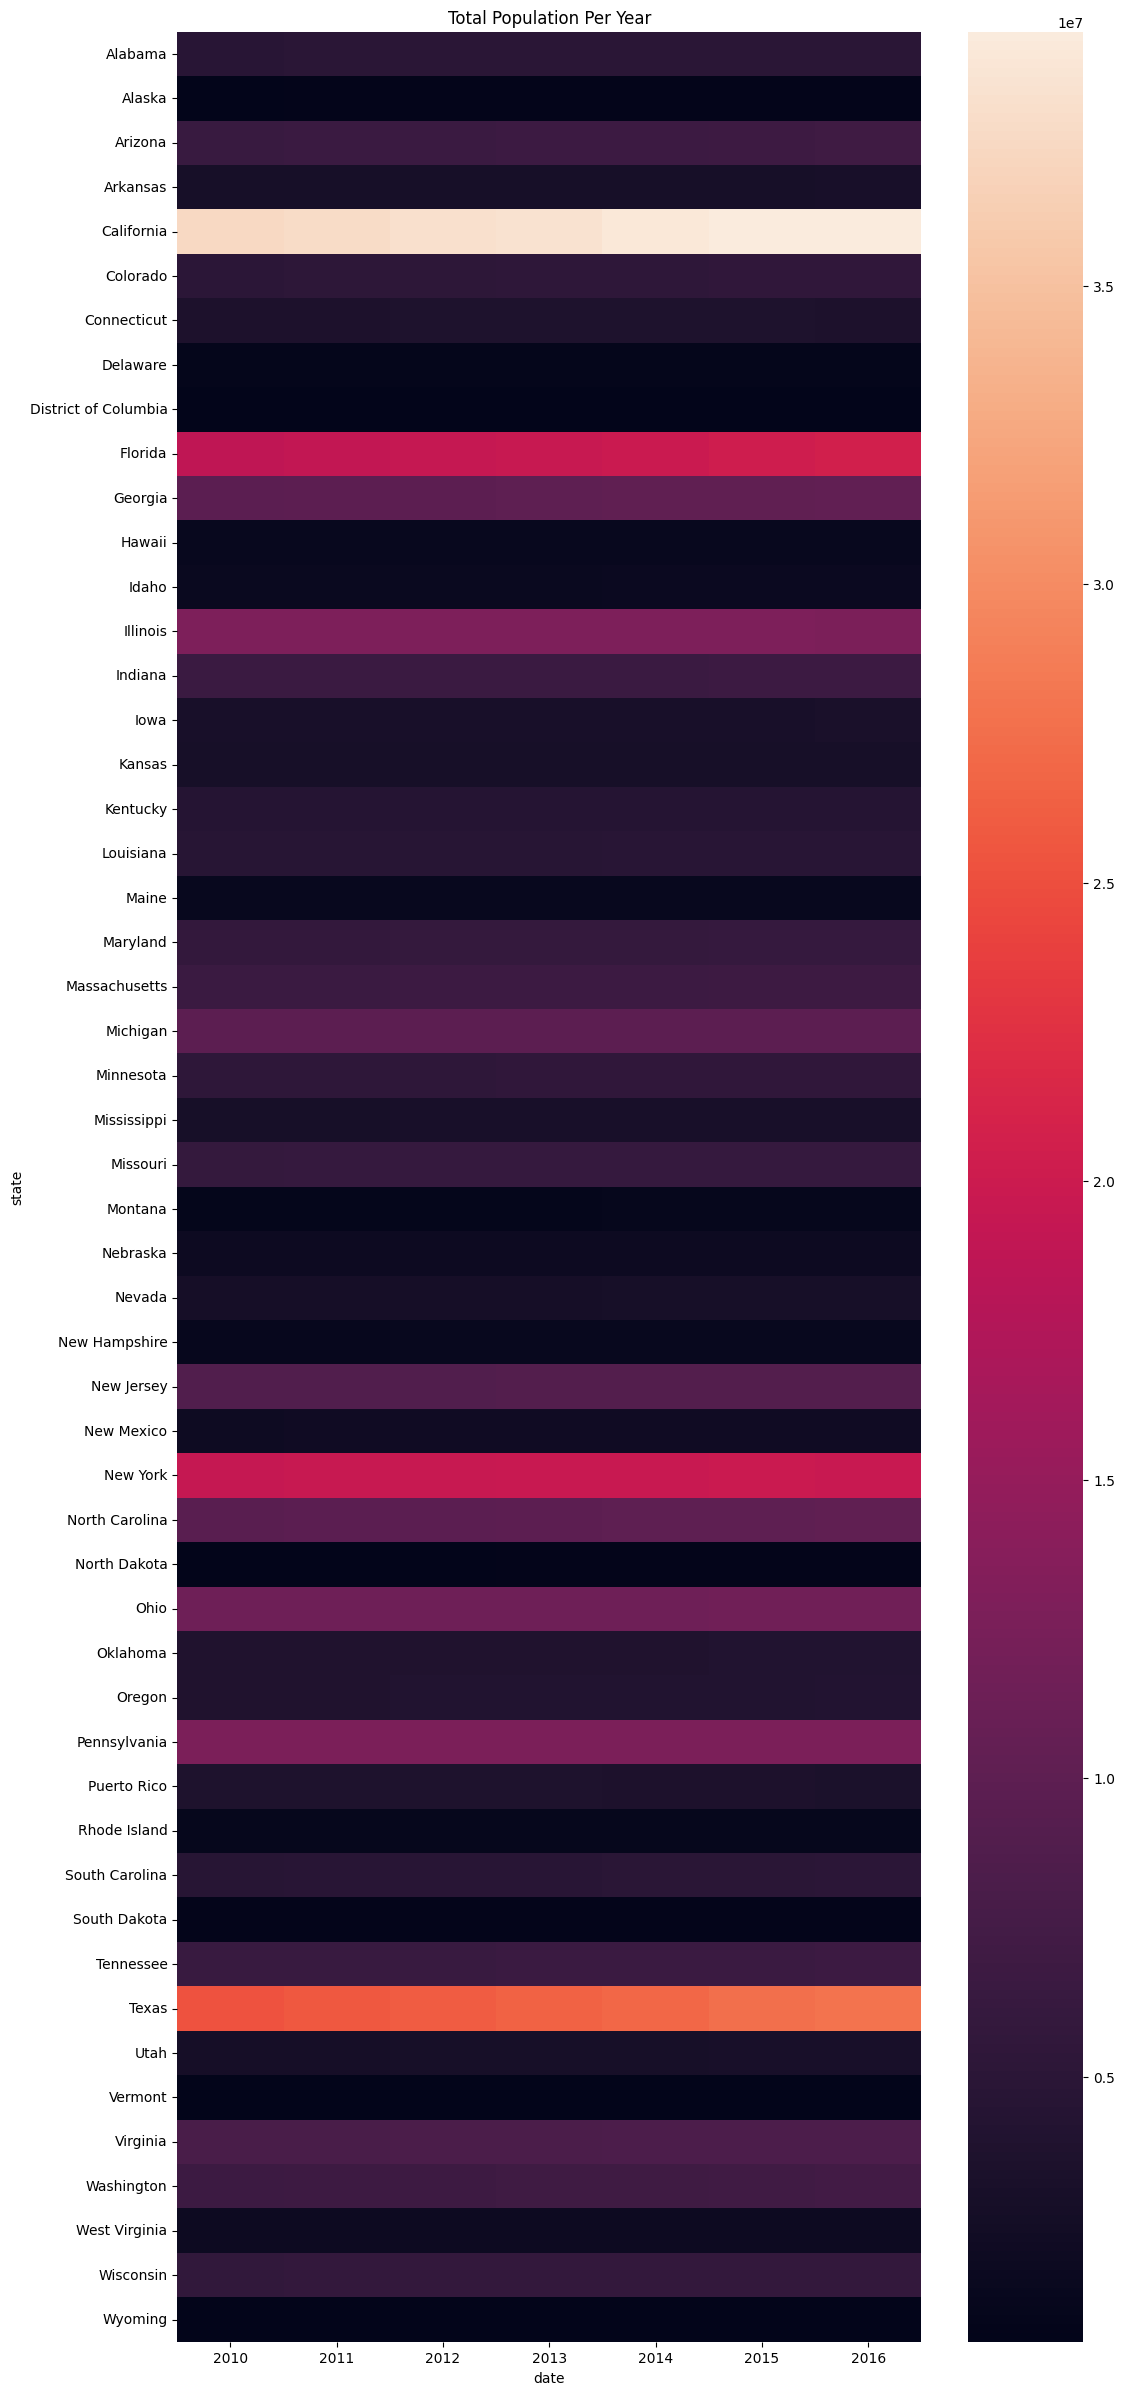

In [13]:
f,ax = plt.subplots(1,1,figsize = (12,30))



df_heatmap = df_ages[df_ages.columns[0:3]].pivot(index=df_ages.columns[0], columns=df_ages.columns[1], values=df_ages.columns[2])
sns.heatmap(data = df_heatmap, ax=ax).set_title('Total Population Per Year')

# Seaborn Example 2: of Heatmap with population per year

Text(0.5, 1.0, 'Total Population Per Year')

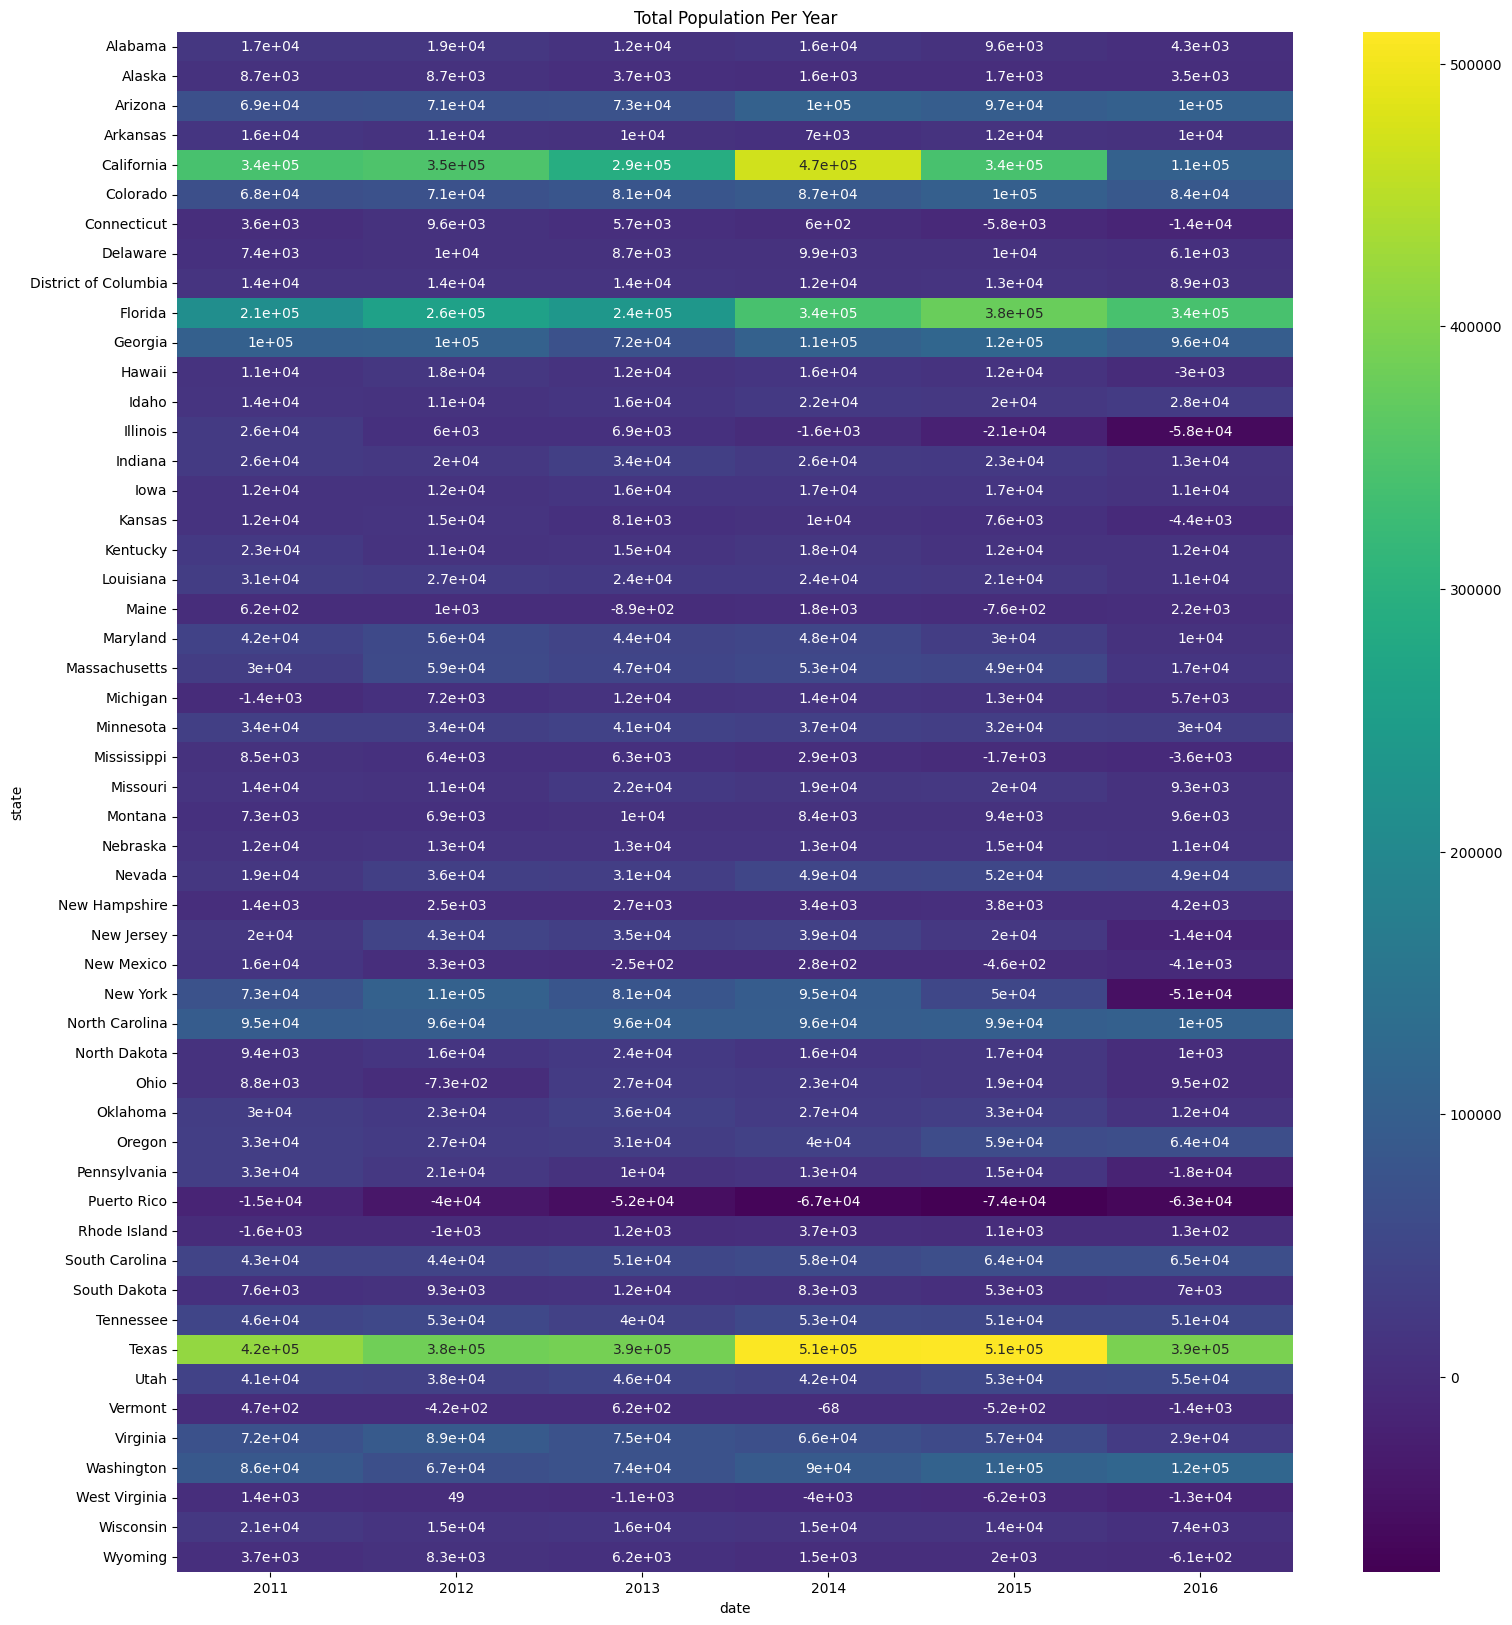

In [14]:
f,ax = plt.subplots(1,1,figsize=(18,20))
df_population_by_year = df_ages[['state','date','total']].copy()
## transform data to columns of states and rows of dates
df_population_by_year_pivot = df_population_by_year.pivot(index='date',columns='state',values='total')
## calculate the number of changes in each year compared to the previous year ---> remove first row as it is 0
df_population_by_year_pivot = df_population_by_year_pivot.diff().dropna()

sns.heatmap(data = df_population_by_year_pivot.T,cmap="viridis",annot=True).set_title('Total Population Per Year')

## Using sum, and variance with pivot

In [15]:
# Top States based on the variance, Min and Max Population increase
state_with_min_increase = df_population_by_year_pivot.sum().sort_values().reset_index().state.values[0]
state_with_max_increase = df_population_by_year_pivot.sum().sort_values().reset_index().state.values[-1]
state_with_max_variance = df_population_by_year_pivot.var().sort_values().reset_index().state.values[-1]
## filter and keep data for the three states
df_population_by_year_3states = df_population_by_year[df_population_by_year.state.isin([state_with_min_increase,state_with_max_increase,state_with_max_variance])].copy()

#df_population_by_year_3states = df_population_by_year_3states.pivot(index="date",columns="state",values="total")

# pivot the data into years


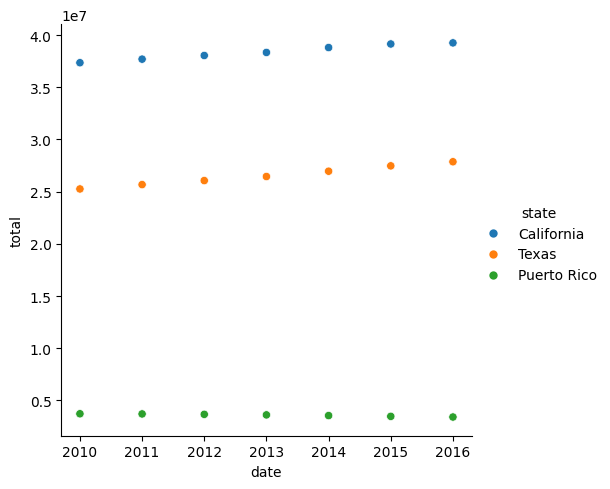

In [16]:
sns.relplot(data=df_population_by_year_3states,x='date',y='total',hue='state')

# Example Altair 1


## Barley dataset from vega

In [17]:
source = data.barley()
source.head(10)

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
5,28.96667,Manchuria,1931,Duluth
6,43.06666,Glabron,1931,University Farm
7,55.20000,Glabron,1931,Waseca
8,28.76667,Glabron,1931,Morris
9,38.13333,Glabron,1931,Crookston


In [18]:
alt.Chart(source).mark_bar().encode(
    x='variety',
    y='sum(yield)',
    color='site'
)

alt.Chart(...)

# Example Altair 2

In [19]:
## sort the dataframe by poputlation total
df_population_by_year_melt = df_population_by_year_pivot.melt(ignore_index=False)
df_population_by_year_melt.head()
df_population_by_year_melt.sort_values(by='value', ascending=False,inplace=True)
df_population_by_year_melt.reset_index(inplace=True)
df_population_by_year_melt.head()

,date,state,value
0,2015,Texas,512156.0
1,2014,Texas,508765.0
2,2014,California,469979.0
3,2011,Texas,417567.0
4,2016,Texas,393482.0


In [20]:
alt.Chart(df_population_by_year_melt).mark_bar().encode(
    x='state',
    y='value',
    color=alt.Color('date:N',
        scale=alt.Scale(scheme='category10')
    )
    ).properties(
    title=['Population Change Each Year'],
    height=400
)

alt.Chart(...)

In [21]:
df_2016_population_change = df_population_by_year_melt[df_population_by_year_melt['date']==2016].copy()
df_2016_population_change.head()

,date,state,value
4,2016,Texas,393482.0
11,2016,Florida,341167.0
17,2016,Washington,117649.0
20,2016,California,105199.0
25,2016,North Carolina,103986.0


In [22]:
## Vega datasets
## "https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/"
data.us_10m.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/us-10m.json'

In [23]:
import altair as alt
from vega_datasets import data
states = alt.topo_feature("https://raw.githubusercontent.com/umassdgithub/Sample_Data/main/cb_2018_us_state_20m_topo.json", 'cb_2018_us_state_20m')

chart = alt.Chart(states
    ).mark_geoshape(
    stroke='black',
    ).encode(
        color='value:Q',
        tooltip=[
             'properties.NAME:N',
             'value:Q'
            ]
    ).transform_lookup(
        lookup='properties.NAME',                         ## properties.NAME is the indicator inside the "geometries" elements in geojson file
        from_=alt.LookupData(                             ## alt.LookupData is used to lookup value from the data source based on the id of each geometry object
                              df_2016_population_change,  ## first param: is the datasource for the visualization
                             'state',                     ## second param: is the name of the column in the data source to be matched with the geometries
                             ['value'])                   ## third param: name of the column to be visualized
    ).properties(
    width=800,
    height=500
    ).project('albersUsa') ## if only US is being projected!

chart

alt.Chart(...)

# Streamgraph

In [24]:
source = df_population_by_year_melt[df_population_by_year_melt['state'].isin(['Texas','Florida','California','Arkansas',
                                                                              'Michigan','Arizona','West Virginia','New York',
                                                                              'North Carilina','Ohio','Georgia','Pennsylvania',
                                                                              'Mississippi','Maryland','Maine','Indiana'])]
alt.Chart(source).mark_area().encode(
    alt.X('date:N',
        #axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('value:Q', stack='center'),
    alt.Color('state:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(
    width=800,
    height=500
    ).interactive()

alt.Chart(...)

# Stack data

In [25]:
## customuize the dataframe for each age group + state name for one particular year
year = 2013
columns = ['state'] + list(df_ages.columns[3:])                   ### make a list, containint "state" and the age groups
df_age_groups =  df_ages[df_ages['date']==year][columns]          ### Filter out other years and only keep 2017
df_age_groups.set_index('state',drop=True,inplace=True)           ### set state as index, for the stacking puposes
df_age_groups = pd.DataFrame(df_age_groups.stack()).reset_index() ### in many visualization tools we need the values to be stacked
df_age_groups.columns = ['state','age group','value']             ### for better look, rename the columns
df_age_groups.head()




,state,age group,value
0,Alabama,Under 5 years,6.0
1,Alabama,5 to 9 years,6.3
2,Alabama,10 to 14 years,6.8
3,Alabama,15 to 19 years,6.8
4,Alabama,20 to 24 years,7.3


In [26]:
df_age_groups

,state,age group,value
0,Alabama,Under 5 years,6.0
1,Alabama,5 to 9 years,6.3
2,Alabama,10 to 14 years,6.8
3,Alabama,15 to 19 years,6.8
4,Alabama,20 to 24 years,7.3
...,...,...,...
931,Puerto Rico,65 to 69 years,5.4
932,Puerto Rico,70 to 74 years,4.2
933,Puerto Rico,75 to 79 years,3.0
934,Puerto Rico,80 to 84 years,2.0


# <font color = red> Challenge 1.1: Seaborn</font>
## Plot heat map of age groups percentage and states, for Year 2012
# -- Note that you do not need a pivot in this challenge. It is just a Matrix, where the values are represnted with color coding.

In [27]:
def plotAgeGroup(year):
  # Filter the data for the specified year
  df_ages_year = df_ages[df_ages['date']==year].copy()

  # Drop non-age group columns
  df_ages_year = df_ages_year.drop(['state', 'date', 'total'], axis=1)

  # Set state names as the index
  df_ages_year.index = df_ages[df_ages['date'] == year]['state'].values

  # Plot the heatmap
  f, ax = plt.subplots(1, 1, figsize=(12, 30))
  sns.heatmap(df_ages_year, annot=True, cmap='YlGnBu', linewidths=.5, ax=ax)

  # Set the title and axis labels
  ax.set_title(f"Age Group Percentage by State for Year {year}", fontsize=16)
  ax.set_xlabel("Age Group", fontsize=12)
  ax.set_ylabel("State", fontsize=12)
  plt.tight_layout()
  plt.show()




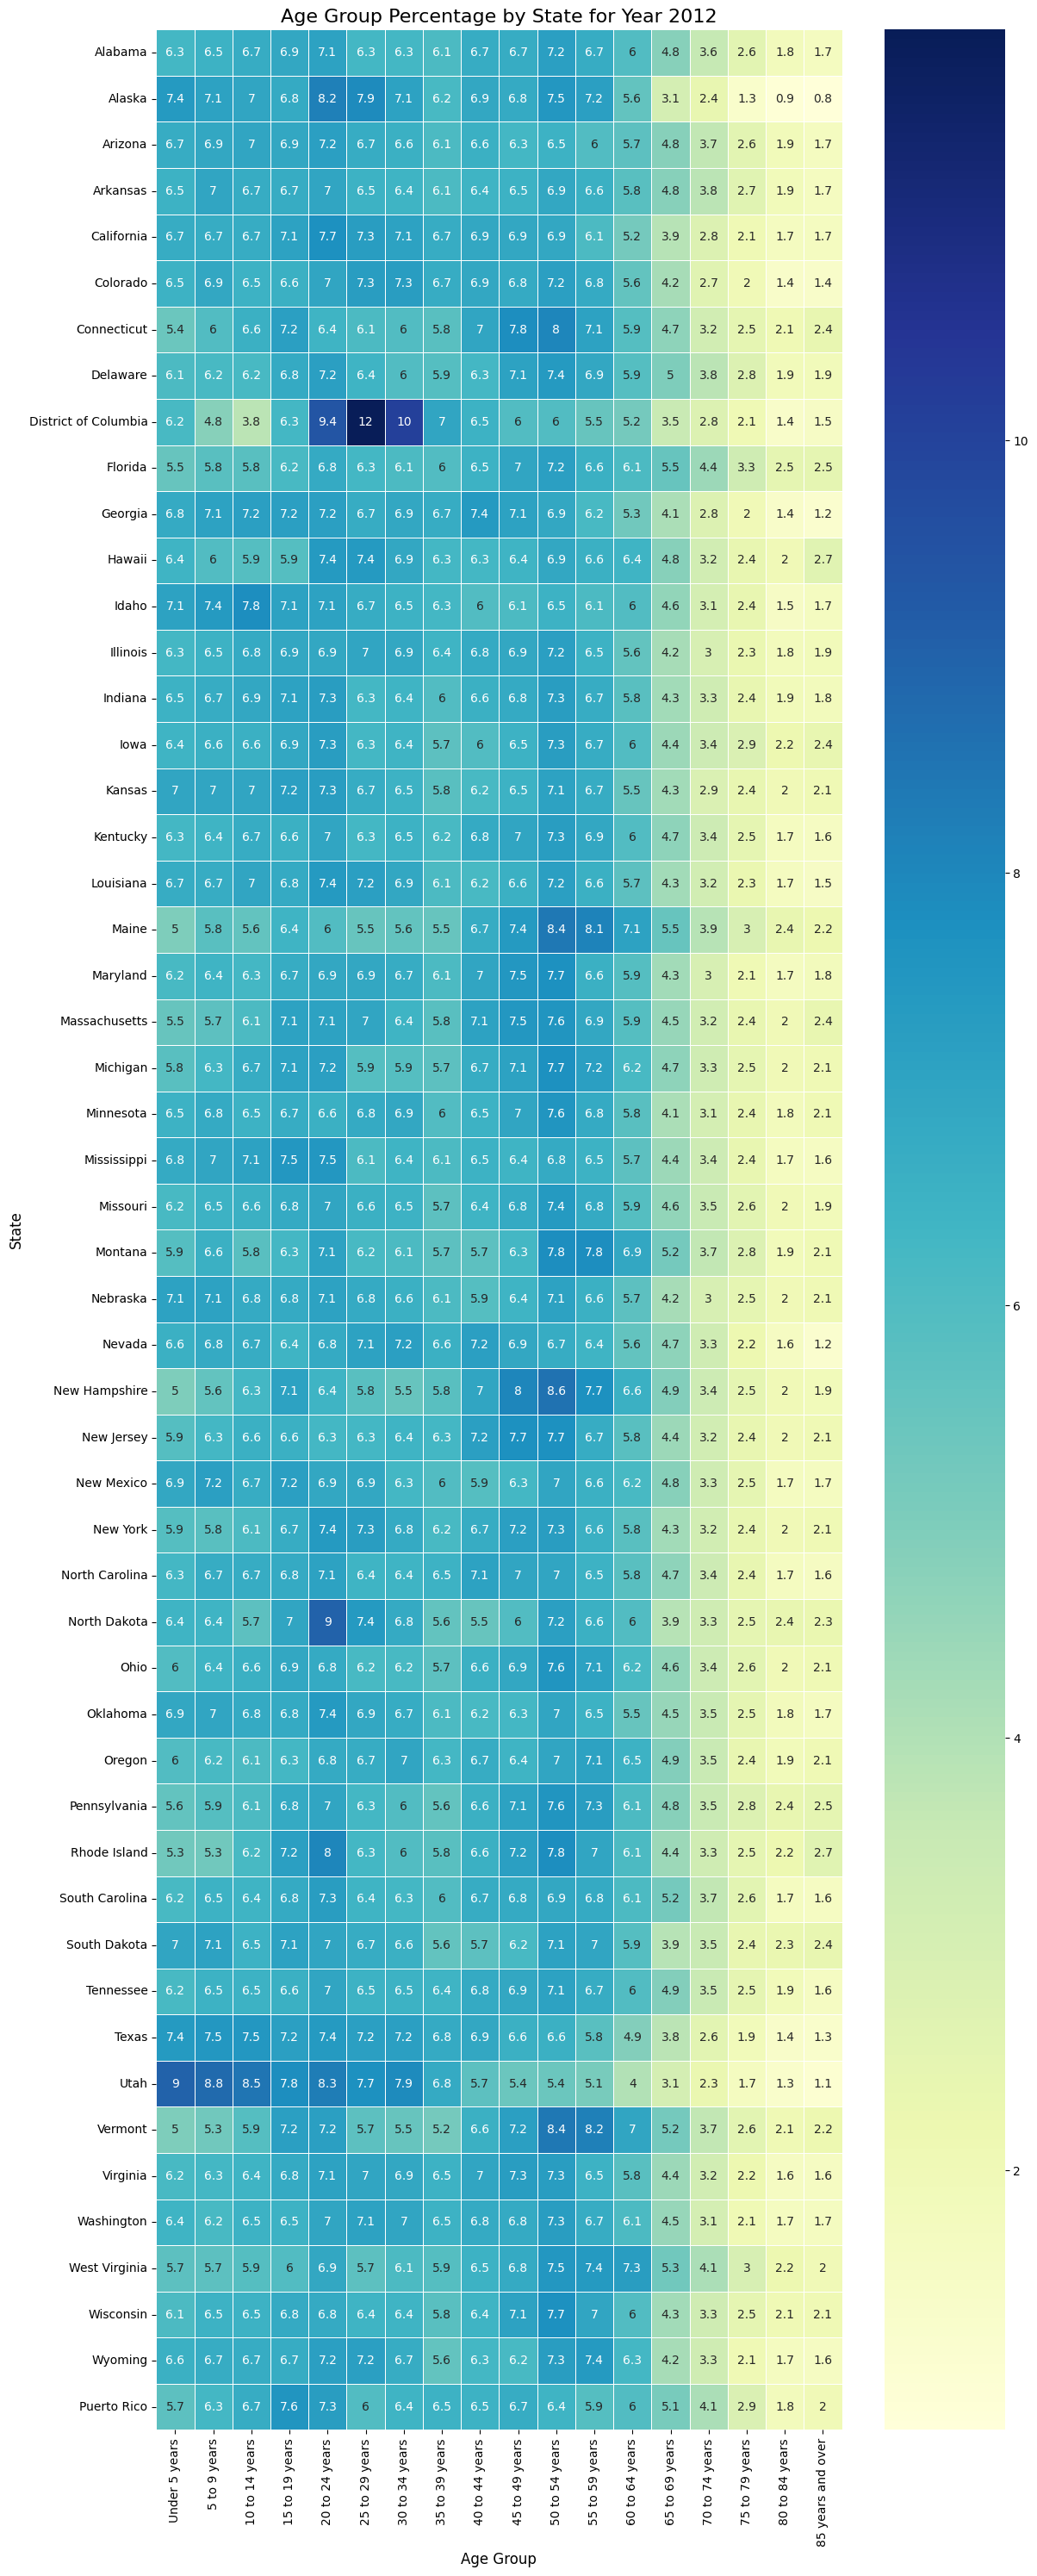

In [28]:
plotAgeGroup(2012)

# <font color = red> Challenge 1.2: Seaborn</font>
##  Regenerate the same visualization, but this time sort by "Under 5 years" and "5 to 9 years" in a descending format

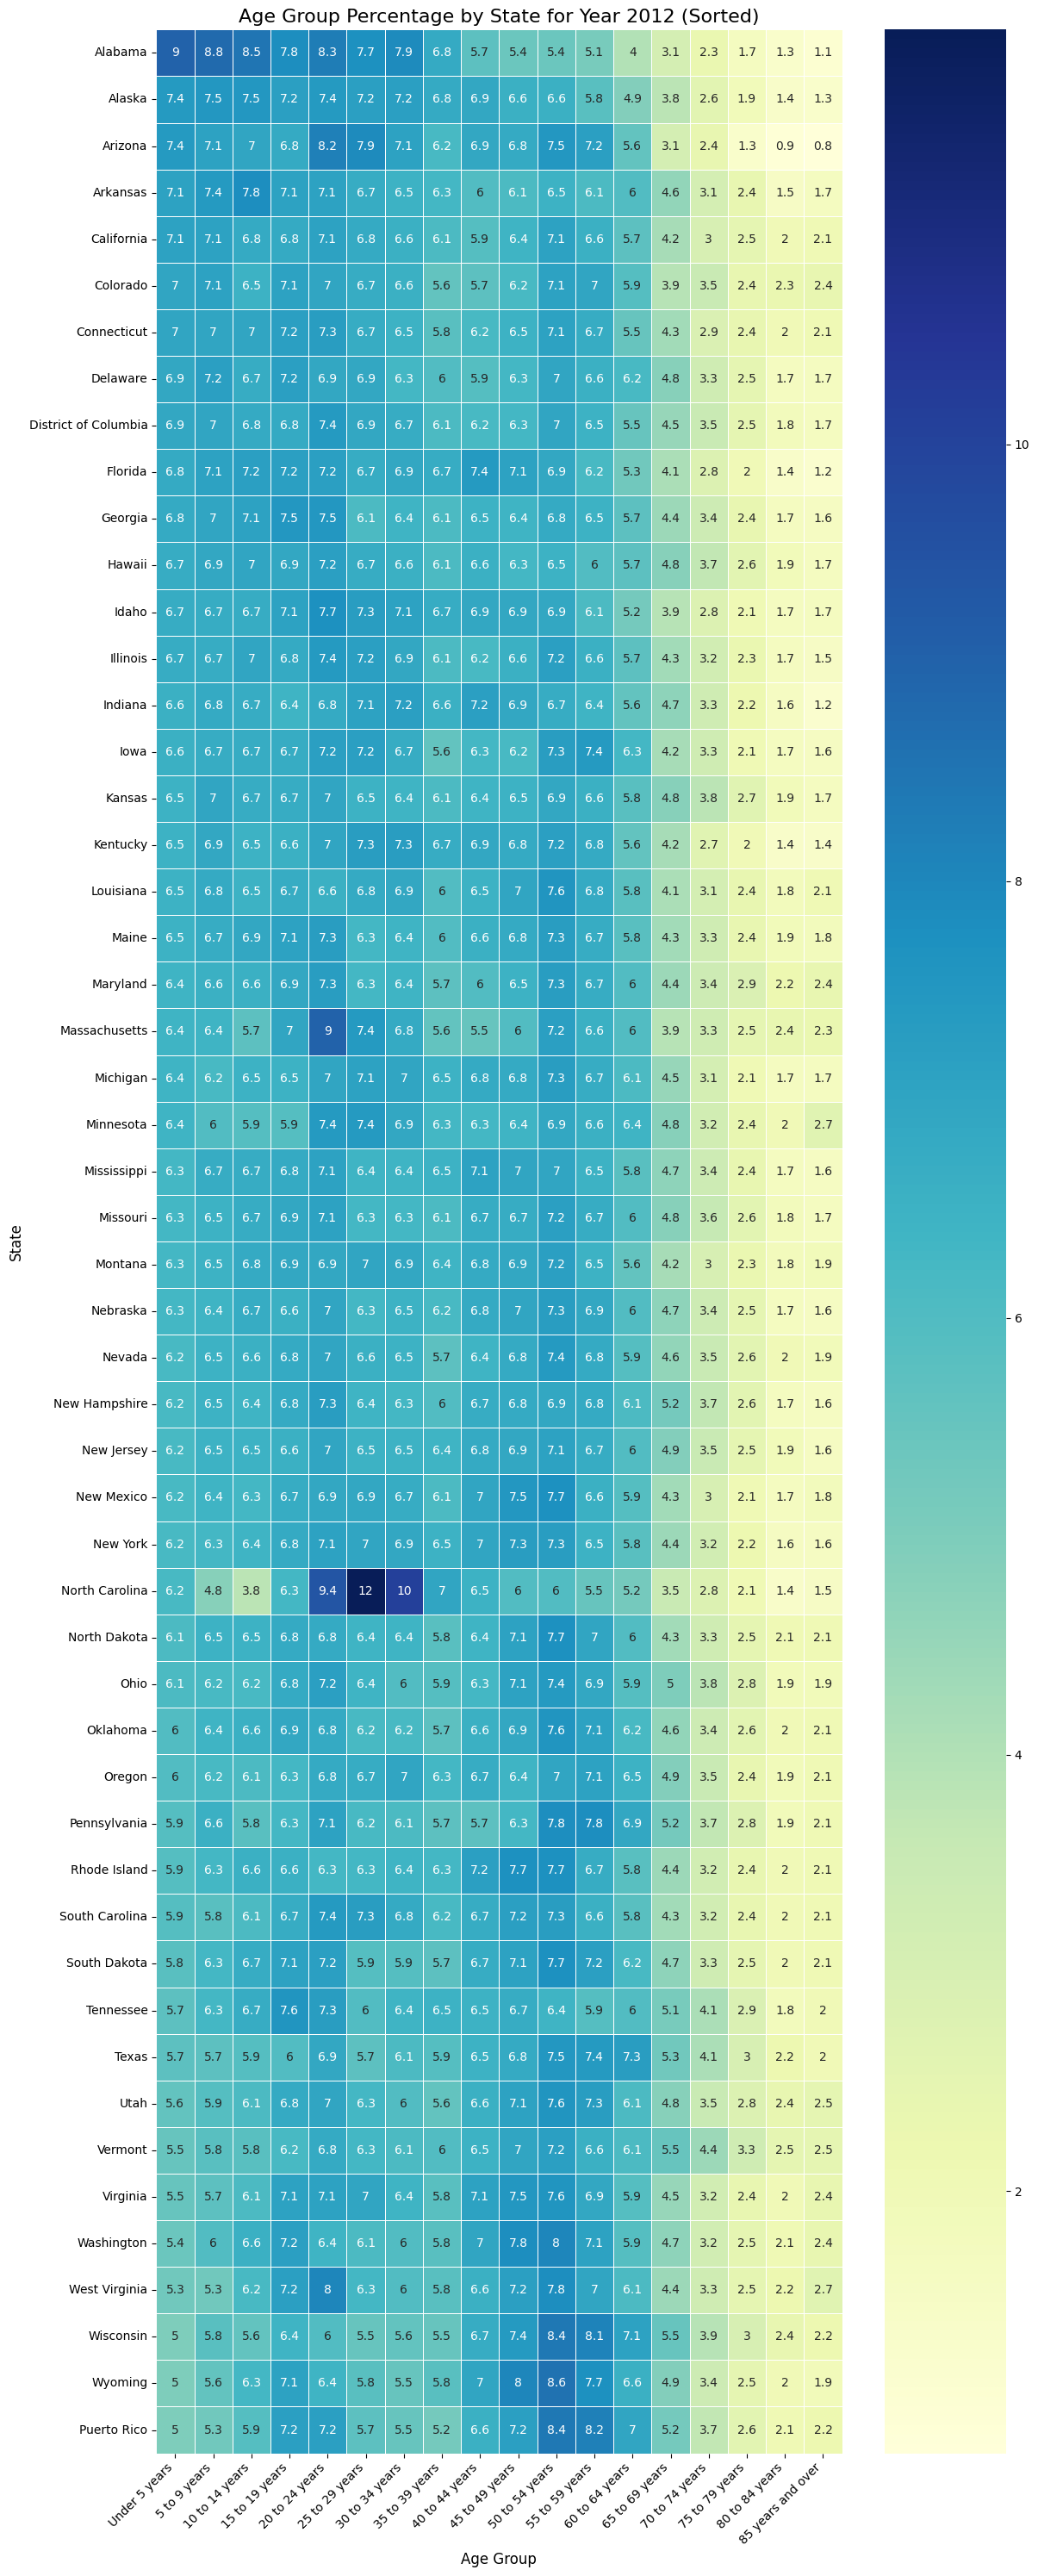

In [29]:
def plotAgeGroupSorted(year):
  f, ax = plt.subplots(1, 1, figsize=(12, 30))

  # Filter the data for the specified year
  df_ages_year = df_ages[df_ages['date'] == year].copy()

  # Sort by 'Under 5 years' and '5 to 9 years' descending
  df_ages_year = df_ages_year.sort_values(by=['Under 5 years', '5 to 9 years'], ascending=False)

  # Drop non-age group columns
  df_ages_year = df_ages_year.drop(['state', 'date', 'total'], axis=1)

  # Set state names as the index
  df_ages_year.index = df_ages[df_ages['date'] == year]['state']

  # Plot the heatmap
  sns.heatmap(df_ages_year, annot=True, cmap='YlGnBu', linewidths=.5, ax=ax)

  # Set the title and axis labels
  ax.set_title(f"Age Group Percentage by State for Year {year} (Sorted)", fontsize=16)
  ax.set_xlabel("Age Group", fontsize=12)
  ax.set_ylabel("State", fontsize=12)

  # Rotate x-axis labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

  plt.tight_layout()
  plt.show()


# Call the function to plot the heatmap for the year 2012
plotAgeGroupSorted(2012)



# <font color=red> Challenge 2: Altair</font>
## Function to plot percentage of population groups for each year

In [30]:
def alt_population(year=2012):
    year = 2012  # Set default year

    # Filter the data for the specified year
    df_year = df_ages[df_ages['date'] == year].copy()

    # Extract age group columns
    age_cols = [col for col in df_year.columns if col not in ['state', 'date', 'total']]

    # Convert data from wide format to long format for plotting
    df_melted = df_year.melt(id_vars=['state'], value_vars=age_cols,
                             var_name='age_group', value_name='percentage')

    # Create a stacked bar chart using Altair
    chart = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X('state:N', sort=None, title='State'),
        y=alt.Y('percentage:Q', stack='normalize', title='Percentage'),
        color=alt.Color('age_group:N', title='Age Group'),
        tooltip=['state:N', 'age_group:N', 'percentage:Q']
    ).properties(
        title=f'Population Age Group Percentage by State in {year}',
        width=800,
        height=400
    ).configure_axisX(
        labelAngle=-45
    )

    return chart

In [31]:
alt_population(year=2012)

alt.Chart(...)

# <font color=red> Challenge 3: Seaborn Matplotlib </font>
## The following population pyramid for all the states is incomplete, make a function that can generate the same pyramid for 1 state only

In [32]:
df_ages_all = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2017.csv",skiprows=1)

Male_population_percent = ["Geographic Area Name",
      "Percent Male!!Estimate!!AGE!!Under 5 years",
      "Percent Male!!Estimate!!AGE!!5 to 9 years",
      "Percent Male!!Estimate!!AGE!!10 to 14 years",
      "Percent Male!!Estimate!!AGE!!15 to 19 years",
      "Percent Male!!Estimate!!AGE!!20 to 24 years",
      "Percent Male!!Estimate!!AGE!!25 to 29 years",
      "Percent Male!!Estimate!!AGE!!30 to 34 years",
      "Percent Male!!Estimate!!AGE!!35 to 39 years",
      "Percent Male!!Estimate!!AGE!!40 to 44 years",
      "Percent Male!!Estimate!!AGE!!45 to 49 years",
      "Percent Male!!Estimate!!AGE!!50 to 54 years",
      "Percent Male!!Estimate!!AGE!!55 to 59 years",
      "Percent Male!!Estimate!!AGE!!60 to 64 years",
      "Percent Male!!Estimate!!AGE!!65 to 69 years",
      "Percent Male!!Estimate!!AGE!!70 to 74 years",
      "Percent Male!!Estimate!!AGE!!75 to 79 years",
      "Percent Male!!Estimate!!AGE!!80 to 84 years",
      "Percent Male!!Estimate!!AGE!!85 years and over"]

### Minor changes here
female_population_percent =["Geographic Area Name",
    "Percent Female!!Estimate!!AGE!!Under 5 years",
    "Percent Female!!Estimate!!AGE!!5 to 9 years",
    "Percent Female!!Estimate!!AGE!!10 to 14 years",
    "Percent Female!!Estimate!!AGE!!15 to 19 years",
    "Percent Female!!Estimate!!AGE!!20 to 24 years",
    "Percent Female!!Estimate!!AGE!!25 to 29 years",
    "Percent Female!!Estimate!!AGE!!30 to 34 years",
    "Percent Female!!Estimate!!AGE!!35 to 39 years",
    "Percent Female!!Estimate!!AGE!!40 to 44 years",
    "Percent Female!!Estimate!!AGE!!45 to 49 years",
    "Percent Female!!Estimate!!AGE!!50 to 54 years",
    "Percent Female!!Estimate!!AGE!!55 to 59 years",
    "Percent Female!!Estimate!!AGE!!60 to 64 years",
    "Percent Female!!Estimate!!AGE!!65 to 69 years",
    "Percent Female!!Estimate!!AGE!!70 to 74 years",
    "Percent Female!!Estimate!!AGE!!75 to 79 years",
    "Percent Female!!Estimate!!AGE!!80 to 84 years",
    "Percent Female!!Estimate!!AGE!!85 years and over"]

In [33]:
df_male = df_ages_all[Male_population_percent]
## There was a typo here I have corrected it.
df_female = df_ages_all[female_population_percent]

In [34]:
## Modify column names
new_cols = ["state"]
[new_cols.append(col.split("!!")[-1]) for col in df_male.columns[1:]]; ## get the column name and keep the last part (eg. "Percent Female!!Estimate!!AGE!!45 to 49 years" ===> "45 to 49 years" )
df_male.columns=new_cols
df_female.columns=new_cols
## Melt the dataframes!
df_male = pd.melt(df_male,id_vars =['state'],
              var_name ='Age', value_name ='Percentage')
### to flip the horizontal bar chart to left, multiply data by -1
df_male['Percentage']=-1*df_male['Percentage']

### melt the second dataset
df_female = pd.melt(df_female,id_vars =['state'],
              var_name ='Age', value_name ='Percentage').dropna()

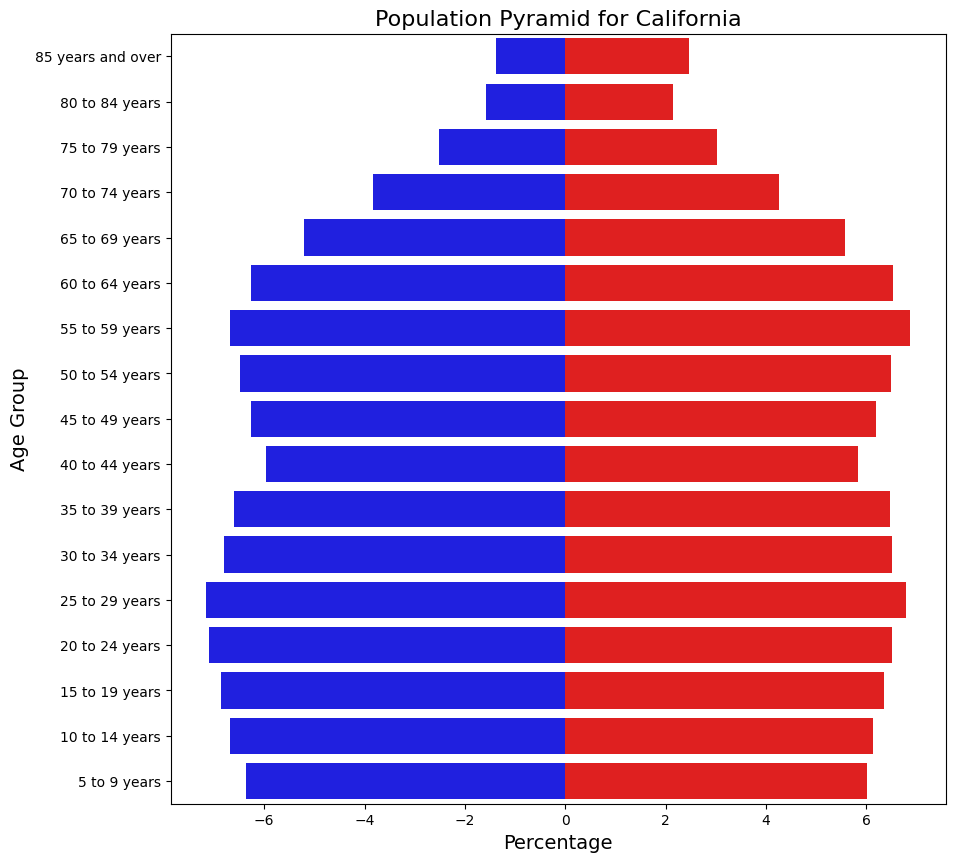

In [35]:
def plot_population_pyramid(state_name):
  # Filter the data for the specified state.
 male_data = df_male[df_male['state'] == state_name]
 female_data = df_female[df_female['state'] == state_name]

 # Creat the plot
 f,ax = plt.subplots(1,1,figsize=(10,10))
 sns.set_style("whitegrid")

 bar_plot = sns.barplot(data=df_male,y='Age',x='Percentage',color='blue',lw=0,order=new_cols[::-1][:-2], errorbar=None)
# Overlay female data
 sns.barplot(data=df_female, y='Age', x='Percentage', color='red', lw=0, order=new_cols[::-1][:-2], errorbar=None, ax=ax)

# Set the plot title and labels.
 ax.set_title(f'Population Pyramid for {state_name}', fontsize=16)
 ax.set_xlabel('Percentage', fontsize=14)
 ax.set_ylabel('Age Group', fontsize=14)

# Set the x-axis tick labels.
xticks = ax.get_xticks()


plt.show()


plot_population_pyramid("California")
## The final visualization may have minor differences



```
# Part 2: This is formatted as code
```

# <font color = "red">Complete the missing part</font>

<ipython-input-36-2d59411f56d8>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([f'{abs(int(x))}%' for x in xticks])
<ipython-input-36-2d59411f56d8>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([f'{abs(int(x))}%' for x in xticks])
<ipython-input-36-2d59411f56d8>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([f'{abs(int(x))}%' for x in xticks])
<ipython-input-36-2d59411f56d8>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([f'{abs(int(x))}%' for x in xticks])
<ipython-input-36-2d59411f56d8>:26: UserWarning: set_ticklabels() should only be used with a fix

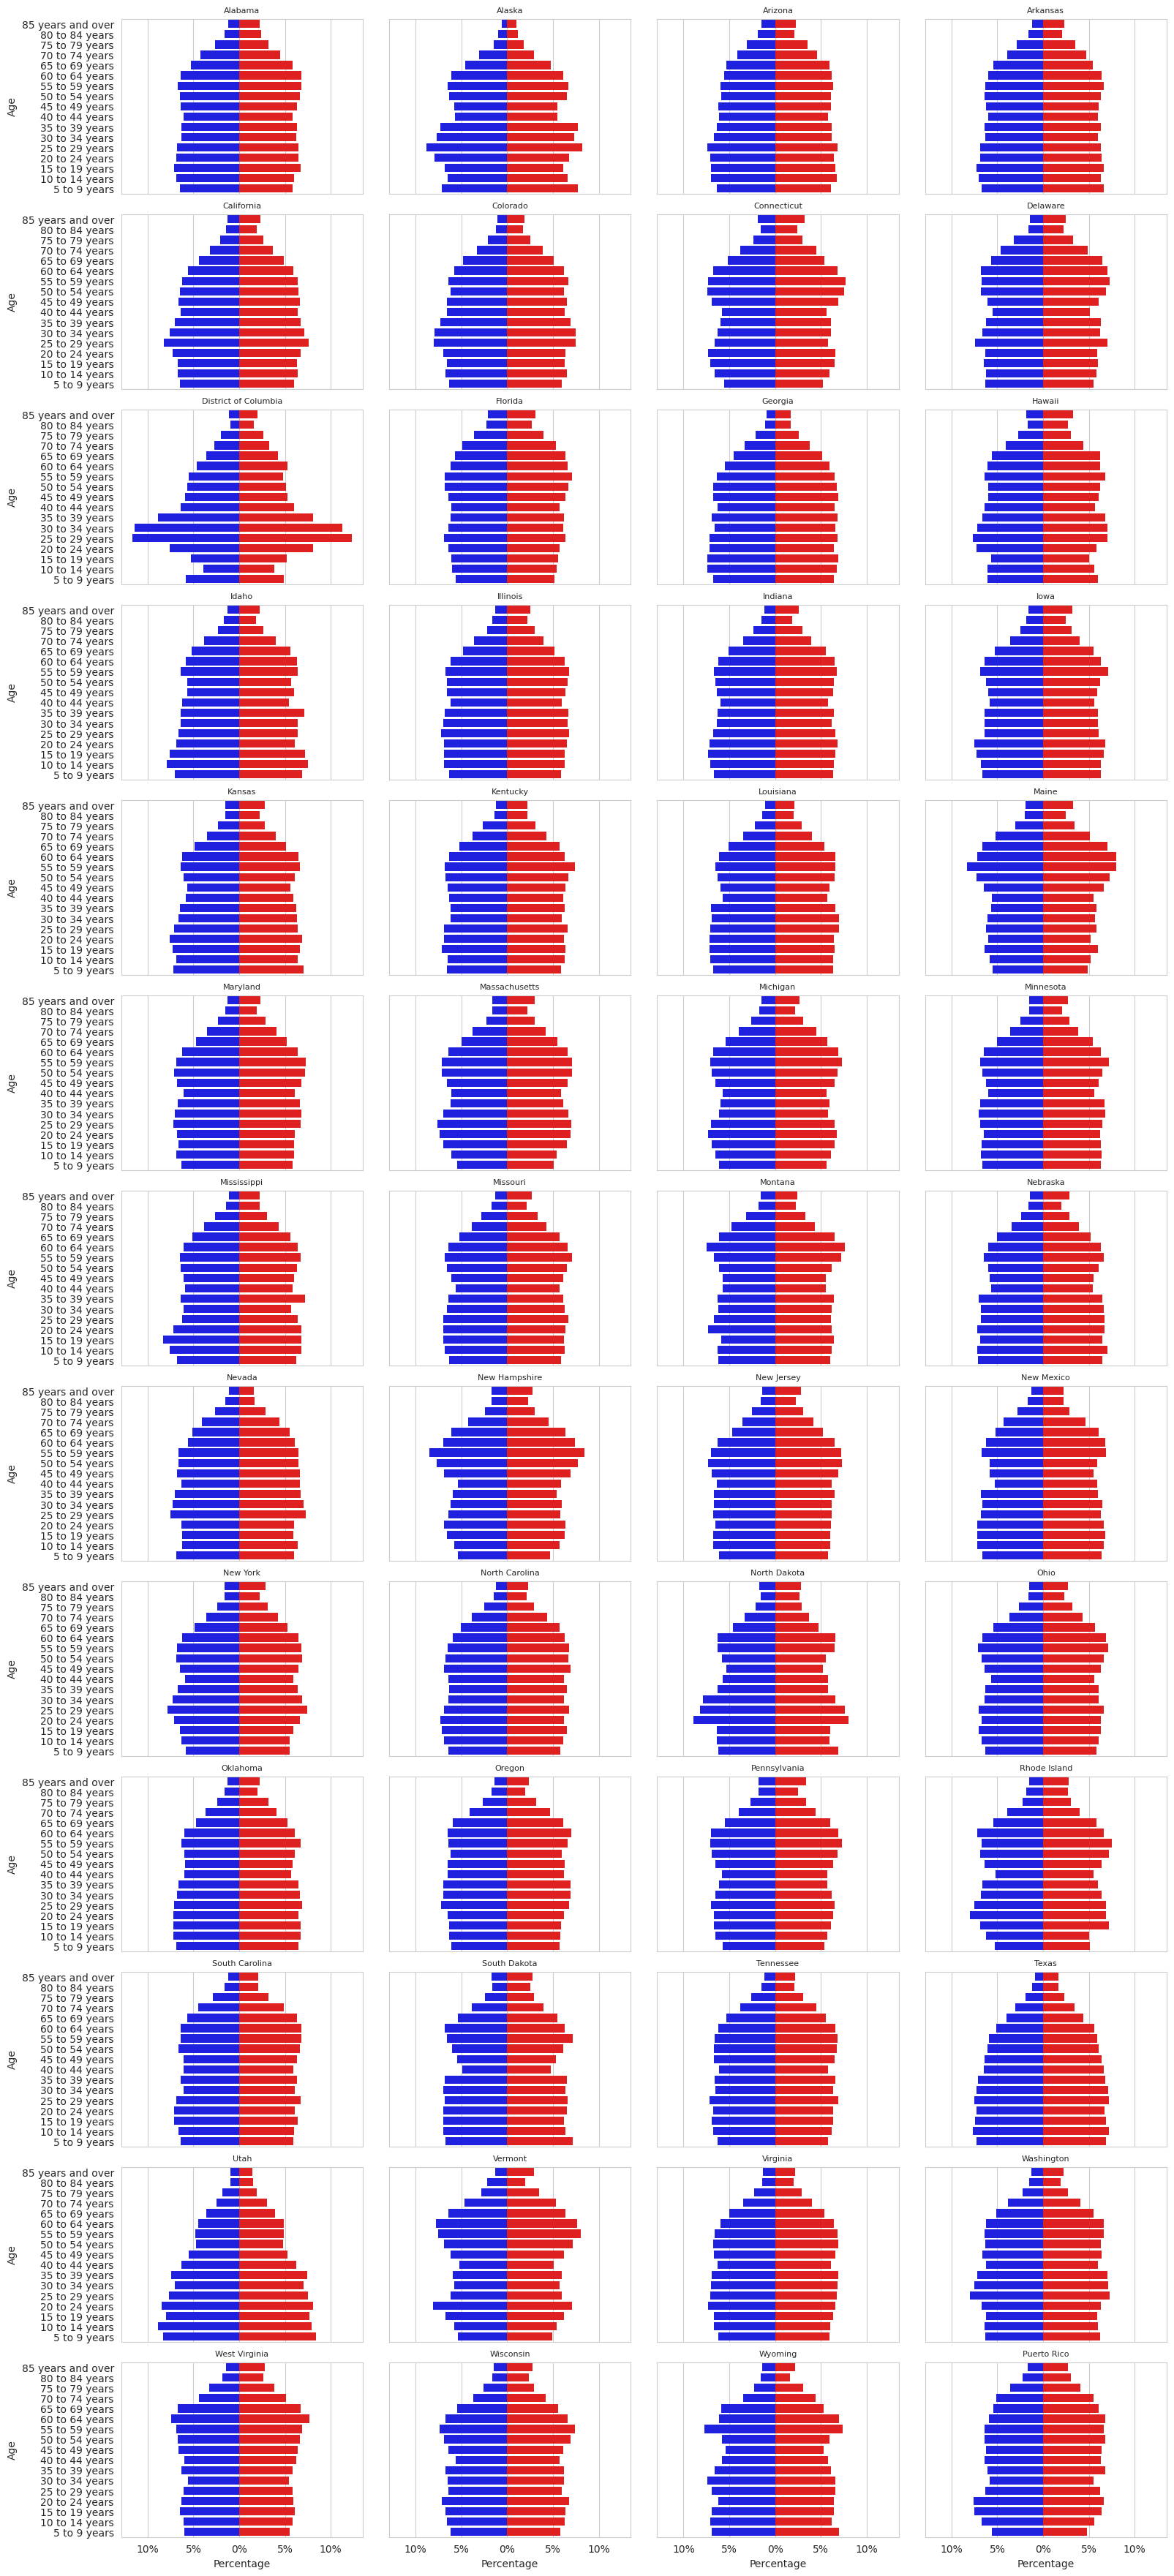

In [36]:
states = df_female.state.unique()
f,ax=plt.subplots(13,4,figsize=(15,35),sharex=True,sharey=True)
f.tight_layout(pad=1)
params = {'axes.labelsize': 8,
         'axes.titlesize':8,
         'xtick.labelsize':8,
         'ytick.labelsize':8}
plt.rcParams.update(params)
axs=ax.ravel()
for i,state in enumerate(states):
# Filter the data for the current state
  male_data = df_male[df_male['state'] == state]
  female_data = df_female[df_female['state'] == state]

# Plot the male population bar chart
  sns.barplot(data=male_data, y='Age', x='Percentage', color='blue', lw=0, order=new_cols[::-1][:-2], errorbar=None, ax=axs[i])

# Plot the female population bar chart
  sns.barplot(data=female_data, y='Age', x='Percentage', color='red', lw=0, order=new_cols[::-1][:-2], errorbar=None, ax=axs[i])

# Set the subplot title
  axs[i].set_title(state, fontsize=8)

# Set the x-axis tick labels
  xticks = axs[i].get_xticks()
  axs[i].set_xticklabels([f'{abs(int(x))}%' for x in xticks])

# Hide extra subplots
for j in range(len(states), len(axs)):
    axs[j].axis('off')

# Display the figure
plt.show()

# <font color=red> Challenge 4: Matplotlib </font>
## Load the Spotify sample data from the following URI using Pandas dataframe.
-----
https://raw.githubusercontent.com/umassdgithub/Sample_Data/main/Spotify_Data.json


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_json("https://raw.githubusercontent.com/umassdgithub/Sample_Data/main/Spotify_Data.json")

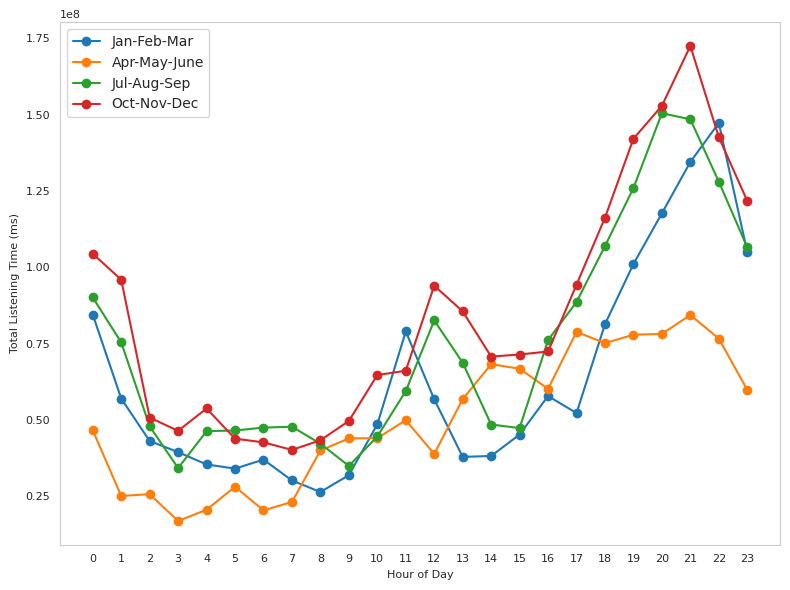

In [39]:
df['ts'] = pd.to_datetime(df['ts'])

# Extract month and hour
df['month'] = df['ts'].dt.month
df['hour'] = df['ts'].dt.hour

# Labels for each quarter
labels = ["Jan-Feb-Mar", "Apr-May-June", "Jul-Aug-Sep", "Oct-Nov-Dec"]

# Create figure and axis
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the curve for each quarter
for i, j in enumerate(range(1, 13, 3)):
    quarter_df = df[df['month'].isin([j, j+1, j+2])]
    hourly_sum = quarter_df.groupby('hour')['ms_played'].sum()
    hourly_sum = hourly_sum.reindex(range(24), fill_value=0)

    ax.plot(hourly_sum.index, hourly_sum.values, marker='o', label=labels[i])

# Set axis labels
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total Listening Time (ms)")

# Show x-axis ticks for every hour
ax.set_xticks(range(24))

# Set y-axis tick interval to 0.25e8
ax.yaxis.set_major_locator(plt.MultipleLocator(0.25e8))

# Remove background grid
ax.grid(False)

# Add legend and adjust layout
ax.legend()
plt.tight_layout()
plt.show()
